<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math




N = 30

L0 = 2                                                # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                      # physical domain (Verificado)             



# Base Matrix (Tchebyshev Polinomials):  (Verificado)

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])




for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi                                     

r0 = 0.5

A0 = 0.0001

sigma = 1

Phi_0 = A0*r**2*np.exp(-(r-r0)**2/sigma**2)            # Phi initial (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)



Phi = np.dot(a0, psi)      # approximative solution in t=0

rPhi= np.dot(a0, rpsi)

rrPhi = np.dot(a0, rrpsi)


In [72]:
# Plot: Initial Conditions ph Phi

M = 3000

rplot = np.linspace(0.000001,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 


psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]


Phi_plot0 = A0*rplot**2*np.exp(-(rplot-r0)**2)     

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

Phiplot = np.dot(a0, psiplot)

erro = Phi_plot0 - Phiplot

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)


(0.0, 8.0)

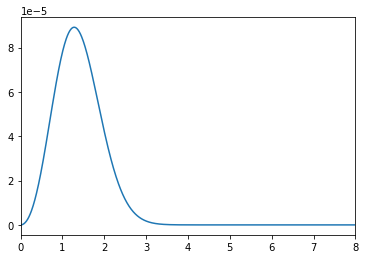

In [61]:
plt.plot(rplot,Phiplot)
plt.xlim(0,8)

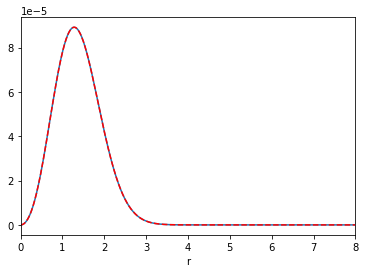

In [ ]:
plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()

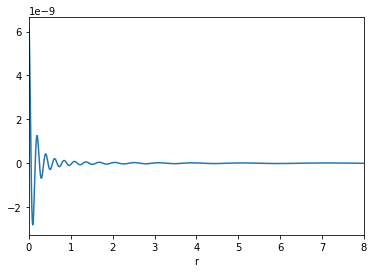

In [ ]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()

In [73]:
# Initial values of PI:

Pi_0 = np.zeros([N+1])

b0 = np.dot(Pi_0, inv_psi)

Pi = np.dot(b0, psi) 

rPi= np.dot(b0, rpsi)

rrPi = np.dot(b0, rrpsi)

In [ ]:
b0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
# Initial Chi: import from maple csv file (N = 30)

url = 'https://raw.githubusercontent.com/phmouras/Projeto_Pos/main/c0_30.csv'

df = pd.read_csv(url)

c0 = np.array(list(map(float,df)))
 
Chi = np.dot(c0, psi)  #(Verificado)

rChi = np.dot(c0, rpsi)

rrChi = np.dot(c0, rrpsi)

In [ ]:
Chi

array([8.23101142e-11, 1.65031288e-10, 2.48582835e-10, 3.33400928e-10,
       4.19947941e-10, 5.08722968e-10, 6.00274033e-10, 6.95212687e-10,
       7.94231810e-10, 8.98127774e-10, 1.00782091e-09, 1.12424372e-09,
       1.24737177e-09, 1.37351434e-09, 1.49310822e-09, 1.59389069e-09,
       1.66880051e-09, 1.72109363e-09, 1.76180551e-09, 1.80247635e-09,
       1.84918952e-09, 1.90117267e-09, 1.95320386e-09, 1.99924350e-09,
       2.03516246e-09, 2.05976169e-09, 2.07435405e-09, 2.08163231e-09,
       2.08450138e-09, 2.08527900e-09, 2.08537746e-09])

In [ ]:
# Initial Chi: import from maple csv file (N = 50)

url = 'https://raw.githubusercontent.com/phmouras/Projeto_Pos/main/c0_50.CSV'

df = pd.read_csv(url)

c0 = np.array(list(map(float,df)))
 
Chi = np.dot(c0, psi)

rChi = np.dot(c0, rpsi)

rrChi = np.dot(c0, rrpsi)

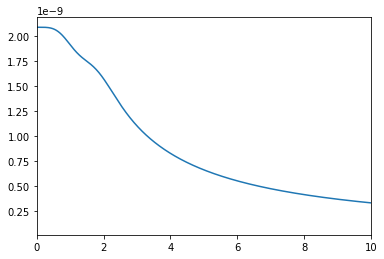

In [ ]:
Chiplot = abs(np.dot(c0, psiplot))


plt.plot(rplot, Chiplot)
plt.xlim(0,10)
plt.show()

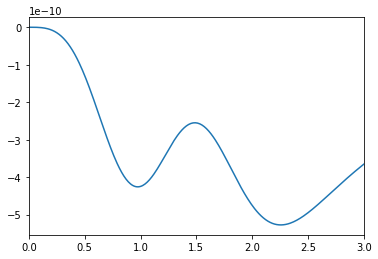

In [ ]:
rChiplot = np.dot(c0, rpsiplot)


plt.plot(rplot, rChiplot)
plt.xlim(0,3)
plt.show()

In [75]:
# Initial values of Krr:

#Krr_0 = np.zeros([N+1])


SB1 = 1/2*(SB[2:(N+3),:] + SB[0:(N+1),:])

rSB1 = 1/2*(rSB[2:(N+3),:] + rSB[0:(N+1),:])

rrSB1 = 1/2*(rrSB[2:(N+3),:] + rrSB[0:(N+1),:])


#inv_SB1 = np.linalg.inv(SB1)

#ck0 = np.dot(Krr_0, inv_SB1)


# Equation for Krr: momentum constraint

#res_krr = 2*np.dot(rChi,Krr) + rKrr + 3/r*Krr + np.dot(Pi,rPhi)*np.exp(4*Chi)

Matrix_Krr = 2*rChi*SB1 + rSB1 + (3/r)*SB1 

inv_matrix_krr = np.linalg.inv(Matrix_Krr)

ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)

Krr = np.dot(ck0, SB1) 
rKrr = np.dot(ck0, rSB1)
rrKrr = np.dot(ck0, rrSB1)

In [ ]:
ck0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
# Equation for Alpha:


# Initial values of alpha:

#Alpha_0 = np.zeros([N+1])

V = 0

#res_alpha = rrAlpha + 2*(1/r + rrChi)*rAlpha - 3/2*Alpha*np.exp(-4*Chi)*Krr**2 - Alpha*np.exp(4*Chi)*(Pi*2-V)

Matrix_Alpha = rrpsi + 2*(1/r + rrChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 

inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)

al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)

Alpha = 1 + np.dot(al0, psi)
rAlpha = np.dot(al0, rpsi)
rrAlpha = np.dot(al0, rrpsi)


In [ ]:
al0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:

# Initial values of beta:

# Matrix base para Beta

SB2 = SB[1:(N+2),:]
rSB2 = rSB[1:(N+2),:]
rrSB2 = rrSB[1:(N+2),:]

Matrix_Beta = rSB2/r - SB2/r**2

inv_matrix_beta = np.linalg.inv(Matrix_Beta)

be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)



Beta = np.dot(be0, SB2)
rBeta = np.dot(be0, rSB2)
rrBeta = np.dot(be0, rSB2)

Field  Equations

In [ ]:
# Equation for Phi:   NAO RODAR

da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)

da

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Equation for Pi: KG equation NAO RODAR

db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)

db

array([ 1.89047512e-04, -2.19941043e-04,  2.16204187e-04, -1.06461198e-04,
       -4.83114744e-05,  9.98797753e-05, -3.98937406e-05, -6.50462798e-06,
       -3.60798381e-06,  1.40769411e-05, -5.91129469e-06,  2.15178519e-06,
       -4.41492139e-06,  3.56484798e-06, -2.08986333e-06,  2.22421452e-06,
       -1.98910044e-06,  1.48650854e-06, -1.36625722e-06,  1.20493921e-06,
       -9.88665888e-07,  8.73803368e-07, -7.55461352e-07,  6.34261119e-07,
       -5.43948985e-07,  4.54901706e-07, -3.70224727e-07,  2.95151038e-07,
       -2.20414652e-07,  1.47009989e-07, -7.44610475e-08])

In [ ]:
# Equation for Chi: NAO RODAR

dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    

dc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Quadrature Integration

In [78]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points

new_col[45]



0.998663042133818

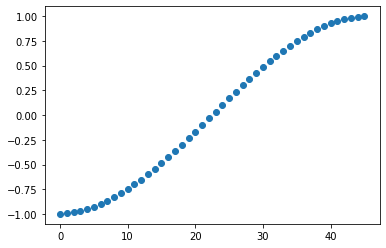

In [ ]:
plt.plot(new_col,'o') 

In [79]:
# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[46]

colP_max = colP[46]

w_col = 2/((1-new_col**2)*colP_max**2)    # peso de Legendre (Verificado)



In [ ]:
type(w_col[0])

numpy.float64

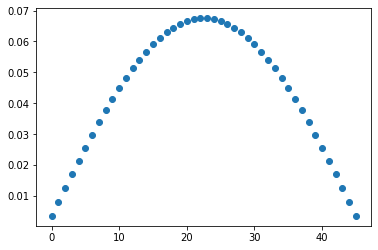

In [ ]:
plt.plot(w_col,'o')

In [80]:
rq = L0*(1+new_col)/(1-new_col) # Verificado



qSB = np.zeros([Nq+3,Nq+1])
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

qPhi = np.dot(a0, qpsi)      
rqPhi= np.dot(a0, rqpsi)
rrqPhi = np.dot(a0, rrqpsi)



In [48]:
qPhi

array([-6.04965791e-09, -2.03677267e-09,  1.91364989e-08,  8.22438598e-08,
        2.25486321e-07,  5.04345314e-07,  9.97997371e-07,  1.81783779e-06,
        3.11564779e-06,  5.08836787e-06,  7.98007019e-06,  1.20830033e-05,
        1.77245578e-05,  2.52151454e-05,  3.47544962e-05,  4.62812767e-05,
        5.92379863e-05,  7.23092541e-05,  8.32318388e-05,  8.89347009e-05,
        8.63285480e-05,  7.39073951e-05,  5.35853495e-05,  3.11130108e-05,
        1.33865562e-05,  3.82822689e-06,  6.23679516e-07,  4.63840538e-08,
        1.15109638e-09, -5.95855087e-12,  1.09507832e-11, -8.58343480e-12,
        2.74546829e-12,  6.85596471e-12, -1.33902868e-11,  5.11515691e-12,
        1.17463270e-11, -6.00792200e-12, -1.33992703e-11, -3.37733818e-12,
        8.85365471e-12,  1.36573647e-11,  1.17050347e-11,  7.14883265e-12,
        3.02465946e-12,  5.77552033e-13])

In [81]:
# Initial Pi for quadrature points

qPi = np.dot(b0, qpsi) 
rqPi= np.dot(b0, rqpsi)
rrqPi = np.dot(b0, rrqpsi)


In [82]:
# Initial Chi for quadrature points:

qChi = np.dot(c0, qpsi)   # Verificado todos
rqChi = np.dot(c0, rqpsi)
rrqChi = np.dot(c0, rrqpsi)


In [83]:
# Initial values of Krr:


qSB1 = 1/2*(qSB[2:(N+3),:] + qSB[0:(N+1),:])

qrSB1 = 1/2*(qrSB[2:(N+3),:] + qrSB[0:(N+1),:])

qrrSB1 = 1/2*(qrrSB[2:(N+3),:] + qrrSB[0:(N+1),:])


qKrr = np.dot(ck0, qSB1) 
rqKrr = np.dot(ck0, qrSB1)
rrqKrr = np.dot(ck0, qrrSB1)

In [ ]:
qKrr

In [92]:
#  Hamiltoniann Constraint: Legendre points

Rho = 1/2*qPi**2 + 1/2*np.exp(-4*qChi)*rqPhi**2      # Energy density
H = 4*rrqChi + 4*rqChi**2 + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 + 8*math.pi*np.exp(4*qChi)*Rho    # = 0



In [87]:
H

array([ 3.55527427e-12,  1.96834070e-11,  1.05057462e-10,  3.62217757e-10,
        9.60118108e-10,  2.17431409e-09,  4.45458876e-09,  8.49680162e-09,
        1.52547840e-08,  2.58520598e-08,  4.14704682e-08,  6.31284730e-08,
        9.07243848e-08,  1.21440132e-07,  1.48688155e-07,  1.61461400e-07,
        1.47373411e-07,  1.01920265e-07,  4.06702945e-08,  1.61699519e-09,
        1.77801803e-08,  7.12833750e-08,  9.64826306e-08,  6.42281183e-08,
        2.05676409e-08,  2.69553178e-09,  1.09345089e-10,  8.98451748e-13,
        7.81102582e-16, -2.01224798e-16,  1.83762782e-16, -9.78909742e-17,
        1.81999040e-17,  2.41351480e-17, -2.33998901e-17,  4.16326024e-18,
        4.15096132e-18, -8.49155162e-19, -6.84822302e-19, -5.48149054e-20,
        3.84507229e-20,  1.24840301e-20,  1.57823005e-21,  7.95511809e-23,
        9.10598392e-25,  2.24720361e-28])

In [96]:
# Erro RMS

erro_H = (1/2*np.dot(H**2,w_col))**1/2

H*

array([ 6.85261876e-27,  3.79388126e-26,  2.02493163e-25,  6.98157164e-25,
        1.85058110e-24,  4.19088498e-24,  8.58600383e-24,  1.63771731e-23,
        2.94028565e-23,  4.98285917e-23,  7.99323166e-23,  1.21677071e-22,
        1.74866853e-22,  2.34069966e-22,  2.86589210e-22,  3.11209019e-22,
        2.84055104e-22,  1.96446368e-22,  7.83900206e-23,  3.11667982e-24,
        3.42704354e-23,  1.37395249e-22,  1.85965592e-22,  1.23796584e-22,
        3.96431306e-23,  5.19550679e-24,  2.10757358e-25,  1.73172218e-27,
        1.50553735e-30, -3.87851042e-31,  3.54193853e-31, -1.88680106e-31,
        3.50794324e-32,  4.65193275e-32, -4.51021535e-32,  8.02448224e-33,
        8.00077667e-33, -1.63670540e-33, -1.31996178e-33, -1.05653072e-34,
        7.41119040e-35,  2.40623627e-35,  3.04196189e-36,  1.53331044e-37,
        1.75513425e-39,  4.33137600e-43])

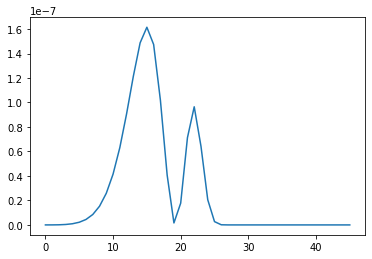

In [90]:
plt.plot(H)

In [100]:
# Runge Kutta 4th order

h = 0.002   # step size
tf = 3

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])    #10
chi_set = np.zeros([It,M])
pi_set = np.zeros([It,M])
erro_set = np.zeros([It])

for i in range(It):
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   # Pi
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    # Chi
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   # Phi
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  Rho = 1/2*qPi**2 + 1/2*np.exp(-4*qChi)*rqPhi**2      # Energy density
  H = 4*rrqChi + 4*rqChi**2 + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 + 8*math.pi*np.exp(4*qChi)*Rho    # = 0
  erro_H = (1/2*np.dot(H**2,w_col))**1/2
  qPhi = np.dot(a0 + L1/2, qpsi)      
  rqPhi= np.dot(a0 + L1/2, rqpsi)
  qPi = np.dot(b0 + N1/2, qpsi) 
  rqPi= np.dot(b0 + N1/2, rqpsi)
  qChi = np.dot(c0 + K1/2, qpsi)
  rqChi = np.dot(c0 + K1/2, rqpsi)
  rrqChi = np.dot(c0 + K1/2, rrqpsi)
  qKrr = np.dot(ck0, qSB1) 
  rqKrr = np.dot(ck0, qrSB1)
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  rrPi = np.dot(b0 + N1/2, rrpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + (3/r)*SB1          # 30
  ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)
  Matrix_Alpha = rrpsi + 2*(1/r + rrChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)
  Matrix_Beta = rSB2/r - SB2/r**2
  be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  rrBeta = np.dot(be0, rrSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   # Pi
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    # Chi  # 46
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   # Phi    # 47
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  Rho = 1/2*qPi**2 + 1/2*np.exp(-4*qChi)*rqPhi**2      # Energy density
  H = 4*rrqChi + 4*rqChi**2 + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 + 8*math.pi*np.exp(4*qChi)*Rho    # = 0
  erro_H = (1/2*np.dot(H**2,w_col))**1/2
  qPhi = np.dot(a0 + L2/2, qpsi)      
  rqPhi= np.dot(a0 + L2/2, rqpsi)
  qPi = np.dot(b0 + N2/2, qpsi) 
  rqPi= np.dot(b0 + N2/2, rqpsi)
  qChi = np.dot(c0 + K2/2, qpsi)
  rqChi = np.dot(c0 + K2/2, rqpsi)
  rrqChi = np.dot(c0 + K2/2, rrqpsi)
  qKrr = np.dot(ck0, qSB1) 
  rqKrr = np.dot(ck0, qrSB1)
  qKrr = np.dot(ck0, qSB1) 
  rqKrr = np.dot(ck0, qrSB1)
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  rrPi = np.dot(b0 + N2/2, rrpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + (3/r)*SB1 
  ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)
  Matrix_Alpha = rrpsi + 2*(1/r + rrChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi    # 62
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)
  Matrix_Beta = rSB2/r - SB2/r**2
  be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  rrBeta = np.dot(be0, rrSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   # Pi
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    # Chi
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   # Phi
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 
  Rho = 1/2*qPi**2 + 1/2*np.exp(-4*qChi)*rqPhi**2      # Energy density
  H = 4*rrqChi + 4*rqChi**2 + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 + 8*math.pi*np.exp(4*qChi)*Rho    # = 0
  erro_H = (1/2*np.dot(H**2,w_col))**1/2
  qPhi = np.dot(a0 + L3, qpsi)      
  rqPhi= np.dot(a0 + L3, rqpsi)
  qPi = np.dot(b0 + N3, qpsi) 
  rqPi= np.dot(b0 + N3, rqpsi)
  qChi = np.dot(c0 + K3, qpsi)
  rqChi = np.dot(c0 + K3, rqpsi)
  rrqChi = np.dot(c0 + K3, rrqpsi)
  qKrr = np.dot(ck0, qSB1) 
  rqKrr = np.dot(ck0, qrSB1)
  qKrr = np.dot(ck0, qSB1) 
  rqKrr = np.dot(ck0, qrSB1)
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  rrPi = np.dot(b0 + N3, rrpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + (3/r)*SB1 
  ck0 = np.dot(- Pi*rPhi*np.exp(4*Chi), inv_matrix_krr)
  Matrix_Alpha = rrpsi + 2*(1/r + rrChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  al0 = np.dot(3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi*2-V), inv_matrix_alpha)
  Matrix_Beta = rSB2/r - SB2/r**2
  be0 = np.dot((3*Alpha*np.exp(-4*Chi)*Krr)/(2*r) , inv_matrix_beta)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  rrKrr = np.dot(ck0, rrSB1)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  rrBeta = np.dot(be0, rrSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   # Pi
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    # Chi
  da = np.dot(Alpha*Pi*np.exp(-6*Chi) + Beta*rPhi, inv_psi)   # Phi
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set[i,:] = np.dot(a0, psiplot)
  pi_set[i,:] = np.dot(b0, psiplot)
  chi_set[i,:] = np.dot(c0, psiplot)
 # erro_set[i] = H*erro_H

In [98]:
erro_set

array([1.92745151e-15, 1.92745151e-15, 1.92745151e-15, ...,
       1.92745154e-15, 1.92745154e-15, 1.92745154e-15])

In [70]:
np.dot(H,w_col)

-1.5651588882382178e-05

In [ ]:
7.279109951824413e-08

3500

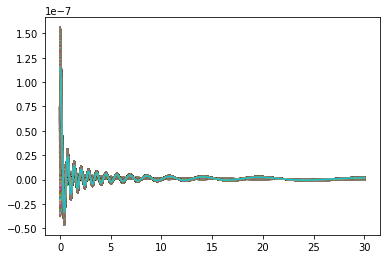

In [ ]:
for i in range(It):
  plt.plot(rplot, chi_set[i,:])

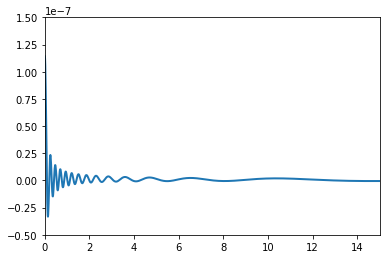

In [ ]:
# Animation plot fo Chi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim = (-0.5e-07, 1.5e-07))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):   # i = frame
  y = chi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=2, blit=True)

HTML(anim.to_html5_video())

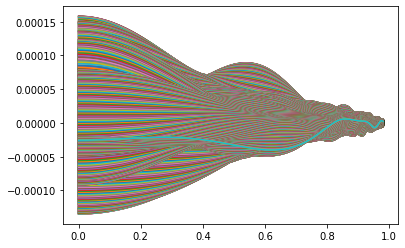

In [ ]:
for i in range(It):
  plt.plot(colplot, phi_set[i,:])

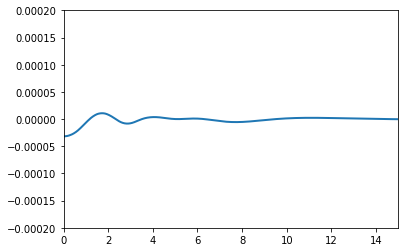

In [ ]:
# Animation plot for Phi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim = (-0.0002, 0.0002))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=10, blit=True)

HTML(anim.to_html5_video())

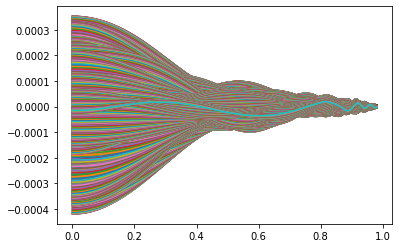

In [ ]:
for i in range(It):
  plt.plot(colplot, pi_set[i,:])

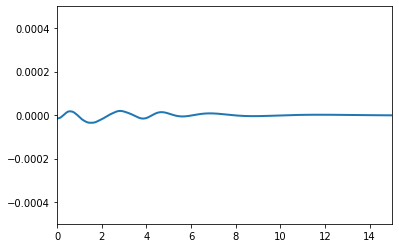

In [ ]:
# Animation plot for Pi:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim = (-0.0005, 0.0005))
line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = pi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=4, blit=True)

HTML(anim.to_html5_video())

Text(0.5, 0, 't')

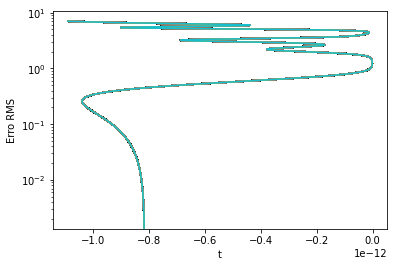

In [ ]:
plt.plot(erro_set, t)
plt.yscale("log")
plt.ylabel("Erro RMS")
plt.xlabel("t")


In [ ]:
t

array([0.00000000e+00, 2.00057159e-03, 4.00114318e-03, ...,
       6.99599886e+00, 6.99799943e+00, 7.00000000e+00])

Text(0.5, 0, 'k')

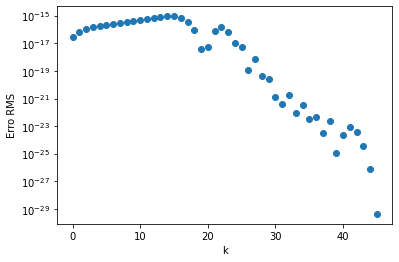

In [ ]:

plt.plot(erro_H,'o')
plt.yscale("log")
plt.ylabel("Erro RMS")
plt.xlabel("k")